### Grading
The final score that you will receive for your programming assignment is generated in relation to the total points set in your programming assignment item—not the total point value in the nbgrader notebook.<br>
When calculating the final score shown to learners, the programming assignment takes the percentage of earned points vs. the total points provided by nbgrader and returns a score matching the equivalent percentage of the point value for the programming assignment. <br>
**DO NOT CHANGE VARIABLE OR METHOD SIGNATURES** The autograder will not work properly if your change the variable or method signatures. 

### Validate Button
Please note that this assignment uses nbgrader to facilitate grading. You will see a **validate button** at the top of your Jupyter notebook. If you hit this button, it will run tests cases for the lab that aren't hidden. It is good to use the validate button before submitting the lab. Do know that the labs in the course contain hidden test cases. The validate button will not let you know whether these test cases pass. After submitting your lab, you can see more information about these hidden test cases in the Grader Output. <br>
***Cells with longer execution times will cause the validate button to time out and freeze. Please know that if you run into Validate time-outs, it will not affect the final submission grading.*** <br>

In [18]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

N.B.: I recommend that you use the `statsmodel` library to do the regression analysis as opposed to *e.g.* `sklearn`. The `sklearn` library is great for advanced topics, but it's easier to get lost in a sea of details and it's not needed for these problems.

# 1.  Polynomial regression using MPG data [25 pts, Peer Review]
We will be using Auto MPG data from UCI datasets (https://archive.ics.uci.edu/ml/datasets/Auto+MPG) to study polynomial regression.

In [19]:
columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
df = pd.read_csv("data/auto-mpg.data", header=None, delimiter=r"\s+", names=columns) 
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 1a) Clean the data (fix data types and remove null or undefined values) and drop the column car_name. [5 pts] 
Replace the data frame with the cleaned data frame. Do not change the column names, and do not add new columns.

In [20]:
pd.set_option('display.max_rows', None)## permanently will show all records in dataframe
#df

In [21]:
# replace data frame with cleaned data frame
# fix data types, remove null or undefined values, drop the column car_name
# NOTE: do not change the column names or add new columns 
# your code here
#del df['car_name']
#features_to_impute = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','weight_norm']
# for c in features_to_impute:
#     df[c].hist()
#     plt.title(c)
#     plt.show()
df["horsepower"] = pd.to_numeric(df["horsepower"],errors='coerce')
df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(value=df['horsepower'].median())

In [22]:
del df['car_name']
#df

In [23]:
# this cell will test that you properly cleaned the dataframe 

### 1b) Fit a simple linear regression model with a feature that maximizes $R^2$. [5 pts]
Which feature is the best predictor, and the resulting r-squared value? Update your answer below.

In [24]:
# your code here

# model = smf.ols(formula = 'mpg~cylinders', data = df)#0.600
# res = model.fit()
# print(res.summary())

# model = smf.ols(formula = 'mpg~displacement', data = df)#0.646
# res = model.fit()
# print(res.summary())

# model = smf.ols(formula = 'mpg~horsepower', data = df)#0.597
# res = model.fit()
# print(res.summary())

# model = smf.ols(formula = 'mpg~weight', data = df)#0.691
# res = model.fit()
# print(res.summary())

# model = smf.ols(formula = 'mpg~acceleration', data = df)#0.175
# res = model.fit()
# print(res.summary())

# model = smf.ols(formula = 'mpg~model_year', data = df)#0.334
# res = model.fit()
# print(res.summary())

# model = smf.ols(formula = 'mpg~origin', data = df)#0.316
# res = model.fit()
# print(res.summary())

best_predictor='weight'
best_r_squared=0.691

In [25]:
# this cell will test best_predictor and best_r_squared

### 1c) Using the feature found above (without normalizing), fit polynomial regression up to N=10 and report $R^2$. Which polynomial degree gives the best result? [10 pts]
Hint: For N-degree polynomial fit, you may have to include all orders upto N. Use a for loop instead of running it manually. The `statsmodels.formula.api` formula string can understand `np.power(x,n)` function to include a feature representing $x^n$.

In [26]:
# return updated best_degree and best_r_squared 
# model = 'mpg ~ weight + I(weight**2)'#0.713
# poly_model = smf.ols(formula = model, data = df)
# res = poly_model.fit()
# print(res.summary())

# model = 'mpg ~ weight + I(weight**3)'#0.713
# poly_model = smf.ols(formula = model, data = df)
# res = poly_model.fit()
# print(res.summary())

# model = 'mpg ~ weight + I(weight**4)'#-0.082
# poly_model = smf.ols(formula = model, data = df)
# res = poly_model.fit()
# print(res.summary())

# model = 'mpg ~ weight + I(weight**5)'#-0.312
# poly_model = smf.ols(formula = model, data = df)
# res = poly_model.fit()
# print(res.summary())

# model = 'mpg ~ weight + I(weight**6)'#-7.96
# poly_model = smf.ols(formula = model, data = df)
# res = poly_model.fit()
# print(res.summary())

# model = 'mpg ~ weight + I(weight**7)'#-8.222
# poly_model = smf.ols(formula = model, data = df)
# res = poly_model.fit()
# print(res.summary())

# model = 'mpg ~ weight + I(weight**8)'#-8.401
# poly_model = smf.ols(formula = model, data = df)
# res = poly_model.fit()
# print(res.summary())

# model = 'mpg ~ weight + I(weight**9)'#-8.529
# poly_model = smf.ols(formula = model, data = df)
# res = poly_model.fit()
# print(res.summary())

# model = 'mpg ~ weight + I(weight**10)'#-8.625
# poly_model = smf.ols(formula = model, data = df)
# res = poly_model.fit()
# print(res.summary())
best_degree = 3 #2
best_r_squared = 0.715#0.713
# your code here

  

In [27]:
# this cell tests best_degree and best_r_squared 

### 1d) Now, let's make a new feature called 'weight_norm' which is weight normalized by the mean value. [5 pts]
Run training with polynomial models with polynomial degrees up to 20. Print out each polynomial degree and $R^2$ value. What do you observe from the result? What are the best_degree and best_r_qaured just based on $R^2$ value?
Inspect model summary from each model. What is the highest order model that makes sense (fill the value for the sound_degree)? 

##  My Peer Review answer
Higher order models don't make sense because I am seeing large p-values for the higher degree polynomial models.

In [28]:
best_degree = 20#11
best_r_squared = -8.961#0.713#0.715#0.692#0.694#0.684#0.699, #0.700
sound_degree = 3

df['weight_norm'] = df['weight']/df['weight'].mean()

from sklearn.model_selection import train_test_split
x_train, x_test= train_test_split(df,test_size=0.2)


#your code here
model = 'mpg ~ weight_norm + I(weight_norm**2)'#0.713
poly_model = smf.ols(formula = model, data = df)
res = poly_model.fit()
print(res.summary())

model = 'mpg ~ weight_norm + I(weight_norm**3)'#0.713
poly_model = smf.ols(formula = model, data = df)
res = poly_model.fit()
print(res.summary())

model = 'mpg ~ weight_norm + I(weight_norm**4)'#-0.082
poly_model = smf.ols(formula = model, data = df)
res = poly_model.fit()
print(res.summary())

model = 'mpg ~ weight_norm + I(weight_norm**5)'#-0.312
poly_model = smf.ols(formula = model, data = df)
res = poly_model.fit()
print(res.summary())

model = 'mpg ~ weight_norm + I(weight_norm**6)'#-7.96
poly_model = smf.ols(formula = model, data = df)
res = poly_model.fit()
print(res.summary())

model = 'mpg ~ weight_norm + I(weight_norm**7)'#-8.222
poly_model = smf.ols(formula = model, data = df)
res = poly_model.fit()
print(res.summary())

model = 'mpg ~ weight_norm + I(weight_norm**8)'#-8.401
poly_model = smf.ols(formula = model, data = df)
res = poly_model.fit()
print(res.summary())

model = 'mpg ~ weight_norm + I(weight_norm**9)'#-8.529
poly_model = smf.ols(formula = model, data = df)
res = poly_model.fit()
print(res.summary())

model = 'mpg ~ weight_norm + I(weight_norm**10)'#-8.625
poly_model = smf.ols(formula = model, data = df)
res = poly_model.fit()
print(res.summary())

model = 'mpg ~ weight_norm + I(weight_norm**11)'#-8.625
poly_model = smf.ols(formula = model, data = df)
res = poly_model.fit()
print(res.summary())

model = 'mpg ~ weight_norm + I(weight_norm**12)'#0.713
poly_model = smf.ols(formula = model, data = df)
res = poly_model.fit()
print(res.summary())

model = 'mpg ~ weight_norm + I(weight_norm**13)'#0.713
poly_model = smf.ols(formula = model, data = df)
res = poly_model.fit()
print(res.summary())

model = 'mpg ~ weight_norm + I(weight_norm**14)'#-0.082
poly_model = smf.ols(formula = model, data = df)
res = poly_model.fit()
print(res.summary())

model = 'mpg ~ weight_norm + I(weight_norm**15)'#-0.312
poly_model = smf.ols(formula = model, data = df)
res = poly_model.fit()
print(res.summary())

model = 'mpg ~ weight_norm + I(weight_norm**16)'#-7.96
poly_model = smf.ols(formula = model, data = df)
res = poly_model.fit()
print(res.summary())

model = 'mpg ~ weight_norm + I(weight_norm**17)'#-8.222
poly_model = smf.ols(formula = model, data = df)
res = poly_model.fit()
print(res.summary())

model = 'mpg ~ weight_norm + I(weight_norm**18)'#-8.401
poly_model = smf.ols(formula = model, data = df)
res = poly_model.fit()
print(res.summary())

model = 'mpg ~ weight_norm + I(weight_norm**19)'#-8.529
poly_model = smf.ols(formula = model, data = df)
res = poly_model.fit()
print(res.summary())

model = 'mpg ~ weight + I(weight**20)+ weight_norm + I(weight_norm**20)'#-8.625
poly_model = smf.ols(formula = model, data = df)
res = poly_model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     495.0
Date:                Wed, 03 Aug 2022   Prob (F-statistic):          2.49e-108
Time:                        00:31:31   Log-Likelihood:                -1132.9
No. Observations:                 398   AIC:                             2272.
Df Residuals:                     395   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              62.5167    

In [29]:
# tests best_degree, best_r_squared, and sound_degree

### TODO: 
Open the Peer Review assignment for this week to answer a question for section 1d. 

# 2. Multi-Linear Regression [15 pts, Peer Review]

In the following problem, you will construct a simple multi-linear regression model, identify interaction terms and use diagnostic plots to identify outliers in the data. The original problem is as described by John Verzani in the [excellent tutorial 'SimplR' on the R statistics language](https://cran.r-project.org/doc/contrib/Verzani-SimpleR.pdf) and uses data from the 2000 presidential election in Florida. The problem is interesting because it contains a small number of highly leveraged points that influence the model.

In [30]:
votes = pd.read_csv('data/fl2000.txt', delim_whitespace=True, comment='#')
votes = votes[['county', 'Bush', 'Gore', 'Nader', 'Buchanan']]
votes.describe(include='all')

,county,Bush,Gore,Nader,Buchanan
count,67,67.000000,67.000000,67.000000,67.000000
unique,67,NaN,NaN,NaN,NaN
top,Duval,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,43450.970149,43453.985075,1454.119403,260.880597
std,NaN,57182.620266,75070.435056,2033.620972,450.498092
min,NaN,1317.000000,789.000000,19.000000,9.000000
25%,NaN,4757.000000,3058.000000,95.500000,46.500000
50%,NaN,20206.000000,14167.000000,562.000000,120.000000
75%,NaN,56546.500000,46015.000000,1870.500000,285.500000


### 2a. Plot a pair plot of the data using the `seaborn` library. [Peer Review]
Upload a screenshot or saved copy of your plot for this week's Peer Review assignment.<br>
**Note:** your code for this section may cause the Validate button to time out. If you want to run the Validate button prior to submitting, you could comment out the code in this section after completing the Peer Review.

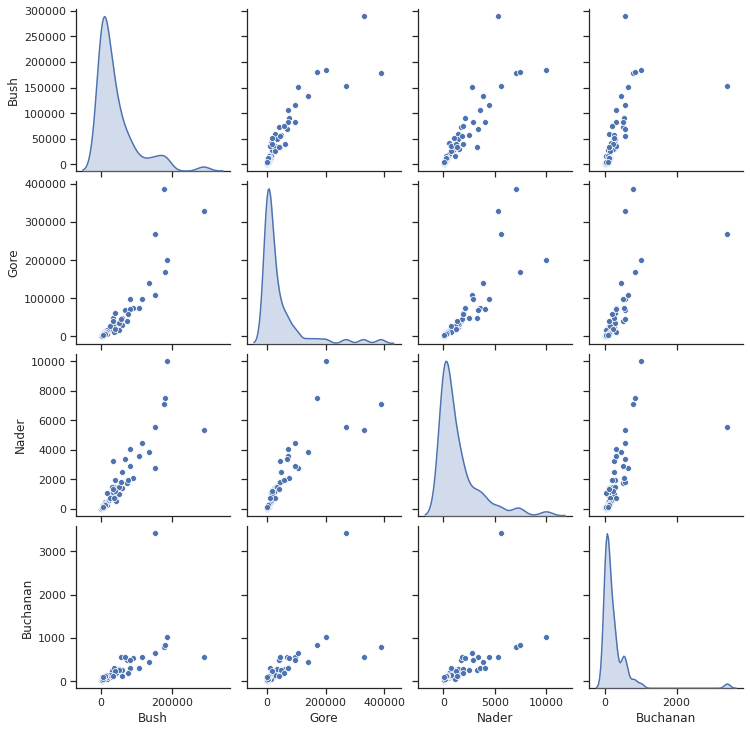

In [31]:
# plot a pair plot of the data using the seaborn library
# possible way to save the image
# plt.savefig('pair_plot.png', dpi = 300, bbox_inches = 'tight')
# your code here
sns.set(style="ticks", color_codes = True)
sns.pairplot(votes,diag_kind="kde")

### 2b. Comment on the relationship between the quantiative datasets. Are they correlated? Collinear? [Peer Review]
You will answer this question in this week's Peer Review assignment.

Yes I am seeing correlation.  For example, in the top right, I see correlation between votes for Bush and Buchanan.  I also see that with Gore and Buchanan.  Finally, I see it with Nader and Buchanan.

I am not seeing collinearity.

### 2c. Multi-linear [5 pts, Peer Review]

Construct a multi-linear model called `model` without interaction terms predicting the Bush column on the other columns and print out the summary table. You should name your model's object as `model` in order to pass the autograder. Use the full data (not train-test split for now) and do not scale features.

In [32]:
# uncomment and construct a multi-linear model 
# model = 'mpg ~ weight_norm + I(weight_norm**13)'#0.713
# poly_model = smf.ols(formula = model, data = df)
# res = poly_model.fit()
# print(res.summary())

x = 'Bush ~ Gore + Nader + Buchanan'# + county'
model = smf.ols(formula = 'Bush ~ Gore + Nader + Buchanan', data = votes).fit()
# your code here
#res = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     149.5
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.35e-28
Time:                        00:31:38   Log-Likelihood:                -758.33
No. Observations:                  67   AIC:                             1525.
Df Residuals:                      63   BIC:                             1533.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8647.6837   3133.545      2.760      0.0

In [33]:
# tests model

Is there any insignificant feature(s)? Explain your answer in this week's Peer Review assignment. 

Yes there is.  The variable Buchanan has a p-value of 0.363 that is over the threshold of 0.05.

### 2d. Multi-linear with interactions [Peer Review]

Construct a multi-linear model with interactions that are statistically significant at the $p = 0.05$ level. You can start with full interactions and then eliminate interactions are do not meet the $p = 0.05$ threshold. Name this model object as `model_multi`.
You will share you solution in this week's Peer Review assignment. 

In [34]:
# uncomment and construct multi-linear model 


In [35]:
# tests model_multi 
# your code here
x = 'Bush ~ Gore + Nader + Buchanan+ Gore:Nader'#0.947
model_multi = smf.ols(formula = x, data = votes)
# your code here
res = model_multi.fit()
print(res.summary())

x = 'Bush ~ Gore + Buchanan'#0.921
model_multi = smf.ols(formula = x, data = votes)
# your code here
res = model_multi.fit()
print(res.summary())

x = 'Bush ~ Gore + Nader + Gore:Nader'#0.914
model_multi = smf.ols(formula = x, data = votes)
# your code here
res = model_multi.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     177.5
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           3.28e-33
Time:                        00:31:38   Log-Likelihood:                -744.00
No. Observations:                  67   AIC:                             1498.
Df Residuals:                      62   BIC:                             1509.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    365.5675   2928.821      0.125      0.9

### 2e. Leverage [Peer Review]

Plot the *leverage* vs. the square of the residual.

These resources might be helpful    
- https://rpubs.com/Amrabdelhamed611/669768
- https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_leverage_resid2.html

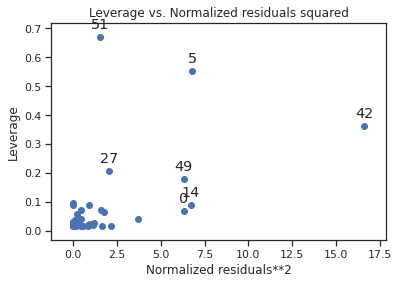

In [36]:
# plot the leverage vs. the square of the residual
# your code here
sm.graphics.plot_leverage_resid2(res)
plt.show()

In [37]:
# you can use this cell to try different plots 
# your code here


Upload your plot for this week's Peer Review assignment. If you tried out multiple models, upload a single model.

### 2f. Identify and Clean [5pts]

The leverage *vs* residual plot indicates that some rows have high leverage but small residuals and others have high residual. The $R^2$ of the model is determined by the residual. The data is from the disputed 2000 election [where one county](https://en.wikipedia.org/wiki/2000_United_States_presidential_election_recount_in_Florida) caused significant issues.

Display the *3 or more* rows for the points indicated having high leverage and/or high residual squared. You will use this to improve the model $R^2$.

Name the list of indices for those high-leverage and/or high-residual points as `unusual`.

In [38]:
# uncomment and fill unusual with list of indices for high-leverage and/or high-residual points
unusual = [51,5,42]
# your code here
votes.iloc[[51,5,42]]

,county,Bush,Gore,Nader,Buchanan
51,Pinellas,184825,200630,10022,1013
5,Broward,177902,387703,7104,795
42,MiamiDade,289533,328808,5352,560


In [39]:
# tests your list of indices for high-leverage and/or high-residual points 

### 2g. Final model [5 pts]

Develop your final model by dropping *one or more* of the troublesome data points indicated in the leverage *vs* residual plot and insuring any interactions in your model are still significant at $p=0.05$. Your model should have an $R^2$ great than 0.95. Call your model `model_final`.

In [40]:
x = 'Bush ~ Gore + Nader + Buchanan+Gore:Buchanan +Gore:Nader+Buchanan:Nader'#0.948
model_multi = smf.ols(formula = x, data = votes)
# your code here
res = model_multi.fit()
print(res.summary())

x = 'Bush ~ Gore + Nader +Gore:Buchanan +Gore:Nader+Buchanan:Nader'#0.948
model_multi = smf.ols(formula = x, data = votes)
# your code here
res = model_multi.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     183.5
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.12e-36
Time:                        00:31:38   Log-Likelihood:                -729.23
No. Observations:                  67   AIC:                             1472.
Df Residuals:                      60   BIC:                             1488.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         52.8673   2781.618      0.

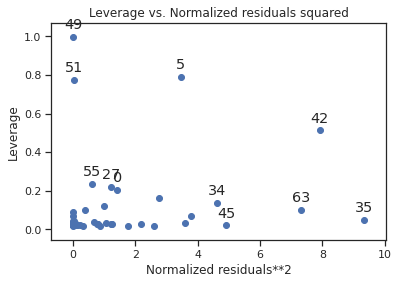

In [41]:
sm.graphics.plot_leverage_resid2(res)
plt.show()

In [42]:
# for x in unusual:#0.902
#     votes = votes.drop(x)
votes = votes.drop(5)#->.927 (42)->.926 (51)->.911

# a_list = #[42,51]->0.916#[5,51]->0.919#[42,5]->0.918
# for x in a_list:
#     votes = votes.drop(x)

In [43]:
votes

,county,Bush,Gore,Nader,Buchanan
0,Alachua,34124,47365,3226,263
1,Baker,5610,2392,53,73
2,Bay,38637,18850,828,248
3,Bradford,5414,3075,84,65
4,Brevard,115185,97318,4470,570
6,Calhoun,2873,2155,39,90
7,Charlotte,35426,29645,1462,182
8,Citrus,29767,25525,1379,270
9,Clay,41736,14632,562,186
10,Collier,60450,29921,1400,122


In [44]:
# develop your model_final here
x = 'Bush ~ Gore + Nader +Gore:Buchanan +Gore:Nader+Buchanan:Nader'#0.957
x = 'Bush ~ Gore +Gore:Buchanan +Gore:Nader+Buchanan:Nader'#0.957
model_final = smf.ols(formula = x, data = votes).fit()
# your code here
#res = model_final.fit()
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     342.1
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           5.00e-41
Time:                        00:31:39   Log-Likelihood:                -709.59
No. Observations:                  66   AIC:                             1429.
Df Residuals:                      61   BIC:                             1440.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2097.7293   2085.781      1.

In [45]:
# tests model_final


## 3. Body Mass Index Model [20 points, Peer Review]

In this problem, you will first clean a data set and create a model to estimate body fat based on the common BMI measure. Then, you will use the **forward stepwise selection** method to create more accurate predictors for body fat.

The body density dataset in file `bodyfat` includes the following 15 variables listed from left to right:
* Density : Density determined from underwater weighing
* Fat : Percent body fat from Siri’s (1956) equation
* Age : Age (years)
* Weight : Weight (kg)
* Height : Height (cm)
* Neck : Neck circumference (cm)
* Chest: Chest circumference (cm)
* Abdomen : Abdomen circumference (cm)
* Hip : Hip circumference (cm)
* Thigh : Thigh circumference (cm)
* Knee : Knee circumference (cm)
* Ankle : Ankle circumference (cm)
* Biceps : Biceps (extended) circumference (cm)
* Forearm : Forearm circumference (cm)
* Wrist : Wrist circumference (cm)

The `Density` column is the "gold standard" -- it is a measure of body density obtained by dunking people in water and measuring the displacement. The `Fat` column is a prediction using another statistical model. The body mass index (BMI) is [calculated as Kg/m^2](https://en.wikipedia.org/wiki/Body_mass_index) and is used to classify people into different weight categories with a [BMI over 30 being 'obese'](https://www.medicalnewstoday.com/info/obesity). You will find that BMI is a poor predictor of the `Density` information it purports to predict. You will try to find better models using measurements and regression.

Unfortunately for us, the dataset we have has imperial units for weight and height, so we will convert those to metric and then calculate the BMI and plot the KDE of the data.

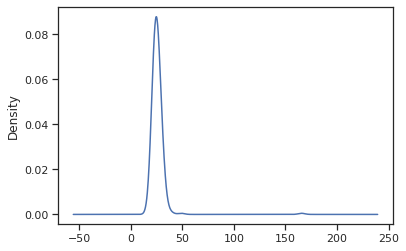

In [46]:
fat = pd.read_csv('data/bodyfat.csv')
fat = fat.drop('Unnamed: 0', axis=1)
fat.Weight = fat.Weight * 0.453592 # Convert to Kg
fat.Height = fat.Height * 0.0254 # convert inches to m
fat['BMI'] = fat.Weight / (fat.Height**2)
fat.BMI.plot.kde();

### 3a. [5 pts]
The BMI has at least one outlier since it's unlikely anyone has a BMI of 165, even [Arnold Schwarzenegger](http://www.health.com/health/gallery/0,,20460621,00.html).

Form a new table `cfat` (cleaned fat) that removes any rows with a BMI greater than 40 and calculate the regression model predicting the `Density` from the `BMI`. Display the summary of the regression model. Call your model as `bmi`. You should achieve an $R^2$ of at least 0.53.

In [47]:
# fat

In [48]:
fat.loc[fat['BMI'] > 40]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
38,1.0202,35.2,46,164.721935,1.83515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.911198
41,1.0250,32.9,44,92.986360,0.74930,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,165.618094


In [49]:
cfat = fat.drop(41)# the order matters

In [50]:
cfat = cfat.drop(38)

In [51]:
# form new table cfat and model bmi
cfat = cfat
x = 'Density ~ BMI'
# your code here
#res = model_final.fit()
#print(model_final.summary())
bmi = smf.ols(formula = x, data = cfat).fit()
print(bmi.summary())
# your code here


                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     286.2
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           3.25e-43
Time:                        00:31:39   Log-Likelihood:                 734.17
No. Observations:                 250   AIC:                            -1464.
Df Residuals:                     248   BIC:                            -1457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1602      0.006    186.410      0.0

In [52]:
# tests your bmi model 

### 3b. [Peer Review]
Plot your regression model against the BMI measurement, properly labeling the scatterplot axes and showing the regression line. In subsequent models, you will not be able to plot the Density *vs* your predictors because you will have too many predictors, but it's useful to visually understand the relationship between the BMI predictor and the `Density` because you should find that the regression line goes through the data but there is too much variability in the data to achieve a good $R^2$.
Upload a copy or screensho of your plot for this week's Peer Review assignment. 

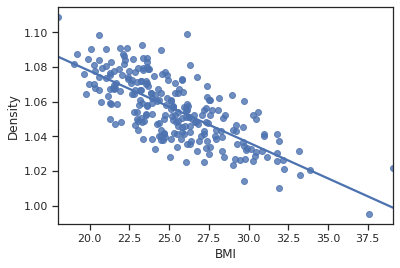

In [53]:
# plot regression model against BMI measurement
# properly label the scatterplot axs and show the regression line
# your code here
sns.regplot(x = "BMI",
            y = "Density", 
            ci = None,
            data = cfat)

 The `BMI` model uses easy-to-measure predictors, but has a poor $R^2 \sim 0.54$. We will use structured subset selection methods from ISLR Chapter 6.1 to derive two better predictors. That chapter covers *best subset*, *forward stepwise* and *backware stepwise* selection. I have implemented the *best subset* selection which searches across all combinations of $1, 2, \ldots, p$ predictors and selects the best predictor based on the $\textit{adjusted}~R^2$ metric. This method involved analyzing $2^{13} = 8192$ regression models (programming and computers for the win). The resulting $\textit{adjusted}~R^2$ plot is shown below (Since the data split can be different, your result may look slightly different):
 
 <img src='fat-best-rsqadj.png'>
 
In this plot, `test_fat` and `train_fat` datasets each containing 200 randomly selected samples were derived from the `cfat` dataset using `np.random.choice` over the `cfat.index` and selected using the Pandas `loc` method. Then, following the algorithm of ISLR Algorithm 6.1 *Best Subset Selection*, all $p \choose k$ models with $k$ predictors were evaluated on the training data and the model returning the best $\textit{Adjusted}~R^2$ was selected. These models are indicated by the data points for the solid blue line. As the text indicates, other measures (AIC, BIC, $C_p$) would be better than the $\textit{Adjusted}~R^2$, but we use it becuase because you've already seen the $R^2$ and should have an understanding of what it means.

Then, the best models for each $k$ were evaluated for the `test_fat` data. These results are shown as the red dots below the blue line. Note that because the test and train datasets are randomly selected subsets, the results vary from run-to-run and it may that your test data produces better $R^2$ than your training data.

In the following exercises, you can not use the `Density`, `Fat` or `BMI` columns in your predictive models. You can only use the 13 predictors in the `allowed_factors` list.

In [54]:
allowed_factors = ['Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist']

## Forward Stepwise Refinement

You will manually perform the steps of the *forward stepwise selection* method for four parameters. You will do this following Algorithm 6.2 from ISLR. For $k = 1\ldots 4$:
* Set up a regression model with $k$ factors that involves the fixed predictors from the previous step $k-1$
* Try all $p$ predictors in the new $k$th position
* Select the best parameter using $\textit{Adjusted}-R^2$ (e.g. `model.rsquared_adj`) given your training data
* Fix the new parameter and continue the process for $k+1$

Then, you will construct a plot similar to the one above, plotting the $\textit{Adjusted}-R^2$ for each of your $k$ steps and plotting the $\textit{Adjusted}-R^2$ from the test set using that model.

### 3c. [5 pts]
First, construct your training and test sets from your `cfat` dataset. Call the resulting data frame to train_fat and test_fat. train_fat includes randomly selected 125 observations and the test_fat has the rest.

In [55]:
# construct train_fat and test_fat from cfat dataset 
# your code here
train_fat, test_fat= train_test_split(cfat,train_size = 125)#test_size=0.2)
#train_fat

In [56]:
# tests your training and test sets 

### 3d. Conduct the algorithm above for $k=1$, leaving your best solution as the answer [5 pts]
Call your resulting model `train_bmi1`.

In [57]:
best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='Density~'+p, data=train_fat).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

Age 0.040746282042541715
Weight 0.36274781626119124
Height 0.004273859160442317
Neck 0.18839178927053302
Chest 0.43332121266963475
Abdomen 0.6424211292501566
Hip 0.351002995170578
Thigh 0.3288136231541746
Knee 0.30417874416399204
Ankle 0.09434690297778603
Biceps 0.22417017546850193
Forearm 0.14073253563352006
Wrist 0.124273385859207
best: ['Abdomen', 0.6424211292501566]


In [58]:
# uncomment and update your solution 
x = 'Density ~ Abdomen'
train_bmi1 = smf.ols(formula = x, data = train_fat).fit()

# your code here
test_bmi1 = smf.ols(formula = x, data = test_fat).fit()

In [59]:
# tests train_bmi1 model 

### 3e. Conduct the algorithm above for $k=2$, leaving your best solution as the answer [Peer Review]
Name your model object as `train_bmi2`.<br>
Look at this week's Peer Review assignment for questions about $k=2$ through $k=5$. 

In [60]:
allowed_factors.remove('Abdomen')

In [61]:
# your code here

best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='Density~'+p, data=train_fat).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

x = 'Density ~ Abdomen+Chest'
train_bmi2 = smf.ols(formula = x, data = train_fat).fit()
test_bmi2 = smf.ols(formula = x, data = test_fat).fit()

Age 0.040746282042541715
Weight 0.36274781626119124
Height 0.004273859160442317
Neck 0.18839178927053302
Chest 0.43332121266963475
Hip 0.351002995170578
Thigh 0.3288136231541746
Knee 0.30417874416399204
Ankle 0.09434690297778603
Biceps 0.22417017546850193
Forearm 0.14073253563352006
Wrist 0.124273385859207
best: ['Chest', 0.43332121266963475]


### 3f. Conduct the algorithm above for $k=3$, leaving your best solution as the answer [Peer Review]

In [62]:
allowed_factors.remove('Chest')

In [63]:
# your code here
best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='Density~'+p, data=train_fat).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

x = 'Density ~ Abdomen+Chest+Weight'
train_bmi3 = smf.ols(formula = x, data = train_fat).fit()
test_bmi3 = smf.ols(formula = x, data = test_fat).fit()

Age 0.040746282042541715
Weight 0.36274781626119124
Height 0.004273859160442317
Neck 0.18839178927053302
Hip 0.351002995170578
Thigh 0.3288136231541746
Knee 0.30417874416399204
Ankle 0.09434690297778603
Biceps 0.22417017546850193
Forearm 0.14073253563352006
Wrist 0.124273385859207
best: ['Weight', 0.36274781626119124]


### 3g. Conduct the algorithm above for $k=4$, leaving your best solution as the answer [Peer Review]

In [64]:
allowed_factors.remove('Weight')

In [65]:
# your code here
best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='Density~'+p, data=train_fat).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

x = 'Density ~ Abdomen+Chest+Weight+Hip'
train_bmi4 = smf.ols(formula = x, data = train_fat).fit()
test_bmi4 = smf.ols(formula = x, data = test_fat).fit()

Age 0.040746282042541715
Height 0.004273859160442317
Neck 0.18839178927053302
Hip 0.351002995170578
Thigh 0.3288136231541746
Knee 0.30417874416399204
Ankle 0.09434690297778603
Biceps 0.22417017546850193
Forearm 0.14073253563352006
Wrist 0.124273385859207
best: ['Hip', 0.351002995170578]


### 3h. Conduct the algorithm above for $k=5$, leaving your best solution as the answer [Peer Review]

In [66]:
allowed_factors.remove('Hip')

In [67]:
# your code here
best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='Density~'+p, data=train_fat).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

x = 'Density ~ Abdomen+Chest+Weight+Hip+Thigh'
train_bmi5 = smf.ols(formula = x, data = train_fat).fit()
test_bmi5 = smf.ols(formula = x, data = test_fat).fit()

Age 0.040746282042541715
Height 0.004273859160442317
Neck 0.18839178927053302
Thigh 0.3288136231541746
Knee 0.30417874416399204
Ankle 0.09434690297778603
Biceps 0.22417017546850193
Forearm 0.14073253563352006
Wrist 0.124273385859207
best: ['Thigh', 0.3288136231541746]


### 3i. Plot [5 pts]
Plot your resulting $\textit{adjusted}~R^2$ *vs* number of predictors (k=1,2,3,4,5) and overlay the $\textit{adjusted}~R^2$ for the test data. Call the list of the five adjusted r-squared values from the five train_bmi# models as `adjr2_train` and the one from the test data as `adjr2_test`.

In [68]:
# plot resulting adjusted rsquared vs number of predictors (k=1,2,3,4,5)
# overlay the adjusted rsquared for the test data 
# your code here
adjr2_train = []
train1_adjr2 = train_bmi1.rsquared_adj
train2_adjr2 = train_bmi2.rsquared_adj
train3_adjr2 = train_bmi3.rsquared_adj
train4_adjr2 = train_bmi4.rsquared_adj
train5_adjr2 = train_bmi5.rsquared_adj
adjr2_train.append(train1_adjr2)
adjr2_train.append(train2_adjr2)
adjr2_train.append(train3_adjr2)
adjr2_train.append(train4_adjr2)
adjr2_train.append(train5_adjr2)

adjr2_test = []
test1_adjr2 = test_bmi1.rsquared_adj
test2_adjr2 = test_bmi2.rsquared_adj
test3_adjr2 = test_bmi3.rsquared_adj
test4_adjr2 = test_bmi4.rsquared_adj
test5_adjr2 = test_bmi5.rsquared_adj
adjr2_test.append(test1_adjr2)
adjr2_test.append(test2_adjr2)
adjr2_test.append(test3_adjr2)
adjr2_test.append(test4_adjr2)
adjr2_test.append(test5_adjr2)



adjr2_train values are: [0.6395139839595074, 0.6646389787166793, 0.7013194415501572, 0.6990137413626714, 0.7106532213679451]
adjr2_test values are: [0.6652628680968519, 0.6734351871739179, 0.7048290000063493, 0.7023912452670633, 0.7015143550854215]


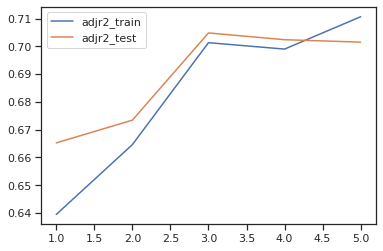

In [75]:
print("adjr2_train values are:", adjr2_train)
print("adjr2_test values are:", adjr2_test)
k = [1,2,3,4,5]
plt.plot(k,adjr2_train, label = 'adjr2_train')
plt.plot(k,adjr2_test, label = 'adjr2_test')
plt.legend()

In [70]:
# tests adjusted r-squared plot vs. number of factors 

### 3j. Discussion [Peer Review]
The BMI model has the benefit being simple (two measurements, height and wright). Looking at your resulting regression model, how many parameters would you suggest to use for your enhanced BMI model? Justify your answer using your models. Submit your answer with this week's Peer Review assignment. 

I would suggest 3.

As shown in the line chart in problem 3i, adjusted R-squared significantly increases up until k = 3 or when the 3rd variable is added.  

Also, looking at the model summary for 3 variables, all 3 variables are significant since the p-values are below the threshold of 0.05.

But then looking at the model summary for 4 variables, 3 of the 4 variables are not significant since the p-values are above the threshold of 0.05.

In [71]:
test_bmi3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Density   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     99.70
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.48e-32
Time:                        00:31:41   Log-Likelihood:                 398.33
No. Observations:                 125   AIC:                            -788.7
Df Residuals:                     121   BIC:                            -777.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2003      0.015     82.201      0.000       1.171       1.229
Abdomen       -0.0020      0.000     -9.416      0.000      -0.002      -0.002
Chest      -8.376e-05      0.000     -0.262      0.794      -0.001       0.001
Weight         0.0006      0.000      3.738      0.000       0.000       0.001
==============================================================================
Omnibus:                        1.215   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                1.140
Skew:                          -0.082   Prob(JB):                        0.566
Kurtosis:                       2.562   Cond. No.                     2.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
test_bmi4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Density   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     74.16
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.60e-31
Time:                        00:31:41   Log-Likelihood:                 398.33
No. Observations:                 125   AIC:                            -786.7
Df Residuals:                     120   BIC:                            -772.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1980      0.028     42.437      0.000       1.142       1.254
Abdomen       -0.0020      0.000     -8.684      0.000      -0.003      -0.002
Chest      -8.051e-05      0.000     -0.250      0.803      -0.001       0.001
Weight         0.0006      0.000      2.689      0.008       0.000       0.001
Hip         3.957e-05      0.000      0.094      0.925      -0.001       0.001
==============================================================================
Omnibus:                        1.280   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.185
Skew:                          -0.088   Prob(JB):                        0.553
Kurtosis:                       2.557   Cond. No.                     5.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""